In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers

ModuleNotFoundError: No module named 'keras'

In [2]:
wineq = pd.read_csv("/home/samtaecay/Downloads/winequality-red.csv")

In [3]:
print(wineq)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [4]:
quality = wineq.quality

In [5]:
winex = wineq.drop(['quality'],axis = 'columns')

In [6]:
#Linear Regression modeling and vinsualization
mlr = LinearRegression()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(winex, quality, train_size = 0.8, test_size = 0.2)

In [8]:
model = mlr.fit(x_train,y_train)

In [9]:
y_pred = mlr.predict(x_test)
print(mlr.coef_)

[ 4.16721565e-02 -1.06347194e+00 -1.53178886e-01  1.86692655e-02
 -1.87566223e+00  5.09174998e-03 -3.60593889e-03 -3.16261274e+01
 -3.65156131e-01  9.15406225e-01  2.46939560e-01]


In [10]:
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.3403239408551467
Test score:
0.4340560441654152


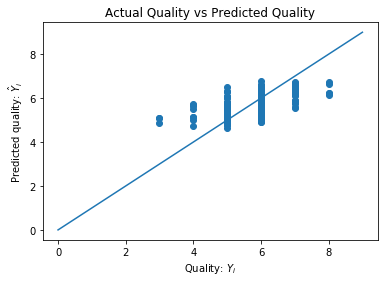

In [11]:
plt.scatter(y_test, y_pred)
plt.plot(range(10), range(10))

plt.xlabel("Quality: $Y_i$")
plt.ylabel("Predicted quality: $\hat{Y}_i$")
plt.title("Actual Quality vs Predicted Quality")

plt.show()

In [12]:
#Neural Network

#Normalization/Data Preparation
mean = x_train.mean(axis=0) 
x_train -=mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

def build_model():
    dlmodel = models.Sequential()
    dlmodel.add(layers.Dense(64, activation = 'relu',input_shape=(train_data.shape[1],)))
    dlmodel.add(layers.Dense(64, activation='relu'))
    dlmodel.add(layers.Dense(1))
    dlmodel.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
    return dlmodel

In [13]:
def build_model(): 
    dlmodel = models.Sequential() 
    
    dlmodel.add(layers.Dense(64, activation = 'relu',input_shape=(train_data.shape[1],))) 
    dlmodel.add(layers.Dense(64, activation='relu')) 
    dlmodel.add(layers.Dense(1)) 
    dlmodel.compile(optimizer='rmsprop',loss='mse', metrics=['mae']) 
    return dlmodel

In [14]:
dlmodel = build_model()
dlmodel.fit(x_train, y_train, epochs=80,batch_size=16,verbose=0)
test_mse_score, test_mae_score

NameError: name 'models' is not defined